## Week4 Individual Assignment: Exploring Seoul Data

Our team project aims to compare transportation system of LA and Seoul. Until now, we only examined LA's data. Thus, in this notebook, I will explore data related to Seoul.   
This notebook is generated to merge a csv, which has no coordinates, and a shape file to visualize population and number of workers of Seoul.  

Census Data : seoul_data_com.csv (a csv written in utf-8)   
Boundary Shapefile : adm_dong_seoul.shp

First thing to do is importing liabraries

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

I combined population, number of workers, and commute mode percentage data into a excel file and exported it to csv. Importing the csv here..

In [2]:
Seoul_data = gpd.read_file('data/seoul_data_com.csv')

Checking basic infos here..

In [3]:
Seoul_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Gu                     425 non-null    object  
 1   Dong                   425 non-null    object  
 2   Population             425 non-null    object  
 3   Number of businesses   425 non-null    object  
 4   Number of workers      425 non-null    object  
 5   Walked                 425 non-null    object  
 6   Bicycle                425 non-null    object  
 7   Taxicab_motorcycle     425 non-null    object  
 8   Public_transportation  425 non-null    object  
 9   Bus                    425 non-null    object  
 10  Subway                 425 non-null    object  
 11  Bus_and_subway         425 non-null    object  
 12  Car                    425 non-null    object  
 13  geometry               0 non-null      geometry
dtypes: geometry(1), object(13)
memory 

Check how the dataframe looks like

In [4]:
Seoul_data.head()

,Gu,Dong,Population,Number of businesses,Number of workers,Walked,Bicycle,Taxicab_motorcycle,Public_transportation,Bus,Subway,Bus_and_subway,Car,geometry
0,종로구,사직동,4765,3541,49536,23.9,3.1,0.6,57,36.4,6.1,14.5,15.3,None
1,종로구,삼청동,1369,712,4577,23.9,3.1,0.6,57,36.4,6.1,14.5,15.3,None
2,종로구,부암동,4348,565,3609,23.9,3.1,0.6,57,36.4,6.1,14.5,15.3,None
3,종로구,평창동,7518,751,3565,23.9,3.1,0.6,57,36.4,6.1,14.5,15.3,None
4,종로구,무악동,3203,581,1598,23.9,3.1,0.6,57,36.4,6.1,14.5,15.3,None


In [5]:
Seoul_data.tail()

,Gu,Dong,Population,Number of businesses,Number of workers,Walked,Bicycle,Taxicab_motorcycle,Public_transportation,Bus,Subway,Bus_and_subway,Car,geometry
420,강동구,둔촌1동,160,19,341,17.3,1.3,0.6,53.7,24.2,9.8,19.7,27.2,None
421,강동구,둔촌2동,11188,1601,9718,17.3,1.3,0.6,53.7,24.2,9.8,19.7,27.2,None
422,강동구,암사1동,16209,1916,5756,17.3,1.3,0.6,53.7,24.2,9.8,19.7,27.2,None
423,강동구,천호2동,17899,3736,14933,17.3,1.3,0.6,53.7,24.2,9.8,19.7,27.2,None
424,강동구,길동,21471,5172,19657,17.3,1.3,0.6,53.7,24.2,9.8,19.7,27.2,None


My goal is to visulalize 'Population', 'Number of workers', and commute mode related columns. 

In [6]:
adm_dong_seoul = gpd.read_file('data/adm_dong_seoul.shp')

Checking to see projected crs here

In [7]:
adm_dong_seoul.crs

<Projected CRS: EPSG:5181>
Name: Korea 2000 / Central Belt
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Korea, Republic of (South Korea) - 126°E to 128°E mainland
- bounds: (126.0, 33.96, 128.0, 38.33)
Coordinate Operation:
- name: Korea Central Belt
- method: Transverse Mercator
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

This shape file DOES have a crs associated to it. (epsg:5181) 
(I'm emphasizing crs here because a shape file that I used before didn't have a crs which made me hard to plot a map on basemap.)

In [8]:
adm_dong_seoul.head()

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,OBJECTID,geometry
0,20200630,1101053,사직동,1,"POLYGON ((197702.069 453187.312, 197703.481 45..."
1,20200630,1101054,삼청동,2,"POLYGON ((197980.839 455346.068, 197995.471 45..."
2,20200630,1101055,부암동,3,"POLYGON ((196621.073 456395.880, 196628.373 45..."
3,20200630,1101056,평창동,4,"POLYGON ((197800.769 459064.245, 197782.531 45..."
4,20200630,1101057,무악동,5,"POLYGON ((196444.745 453384.564, 196471.668 45..."


Good! It has geometry in it, and a column that has same contents as csv.

I need a list of Seoul_data columns

In [9]:
list(Seoul_data)

['Gu',
 'Dong',
 'Population',
 'Number of businesses',
 'Number of workers',
 'Walked',
 'Bicycle',
 'Taxicab_motorcycle',
 'Public_transportation',
 'Bus',
 'Subway',
 'Bus_and_subway',
 'Car',
 'geometry']

I am making a list of columns in order to ignore 'geometry' column to avoid confusion with 'geometry' in the shape file.

In [10]:
Seoul_data_columns_to_keep = ['Gu',
 'Dong',
 'Population',
 'Number of businesses',
 'Number of workers',
 'Walked',
 'Bicycle',
 'Taxicab_motorcycle',
 'Public_transportation',
 'Bus',
 'Subway',
 'Bus_and_subway',
 'Car']

Refining Seoul_data to have the columns that I only need.

In [11]:
Seoul_data = Seoul_data[Seoul_data_columns_to_keep]

In [12]:
Seoul_data

,Gu,Dong,Population,Number of businesses,Number of workers,Walked,Bicycle,Taxicab_motorcycle,Public_transportation,Bus,Subway,Bus_and_subway,Car
0,종로구,사직동,4765,3541,49536,23.9,3.1,0.6,57,36.4,6.1,14.5,15.3
1,종로구,삼청동,1369,712,4577,23.9,3.1,0.6,57,36.4,6.1,14.5,15.3
2,종로구,부암동,4348,565,3609,23.9,3.1,0.6,57,36.4,6.1,14.5,15.3
3,종로구,평창동,7518,751,3565,23.9,3.1,0.6,57,36.4,6.1,14.5,15.3
4,종로구,무악동,3203,581,1598,23.9,3.1,0.6,57,36.4,6.1,14.5,15.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,강동구,둔촌1동,160,19,341,17.3,1.3,0.6,53.7,24.2,9.8,19.7,27.2
421,강동구,둔촌2동,11188,1601,9718,17.3,1.3,0.6,53.7,24.2,9.8,19.7,27.2
422,강동구,암사1동,16209,1916,5756,17.3,1.3,0.6,53.7,24.2,9.8,19.7,27.2
423,강동구,천호2동,17899,3736,14933,17.3,1.3,0.6,53.7,24.2,9.8,19.7,27.2


Now, let's look at adm_dong_seoul shapefile to organize it to make it easier to merge.

In [13]:
list(adm_dong_seoul)

['BASE_DATE', 'ADM_DR_CD', 'ADM_DR_NM', 'OBJECTID', 'geometry']

In [14]:
adm_dong_seoul.head()

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,OBJECTID,geometry
0,20200630,1101053,사직동,1,"POLYGON ((197702.069 453187.312, 197703.481 45..."
1,20200630,1101054,삼청동,2,"POLYGON ((197980.839 455346.068, 197995.471 45..."
2,20200630,1101055,부암동,3,"POLYGON ((196621.073 456395.880, 196628.373 45..."
3,20200630,1101056,평창동,4,"POLYGON ((197800.769 459064.245, 197782.531 45..."
4,20200630,1101057,무악동,5,"POLYGON ((196444.745 453384.564, 196471.668 45..."


I want to rename 'adm_dr_nm' of Seoul_shape to 'Dong' because this is the key for merging two files.

In [15]:
adm_dong_seoul.column = ['BASE_DATE', 'ADM_DR_CD', 'Dong', 'OBJECTID', 'geometry']

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:167: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  super(GeoDataFrame, self).__setattr__(attr, val)


**Because of the error above, I decided to rather create a new column than renaming. (got an answer from stackoverflow)**

In [16]:
adm_dong_seoul['Dong'] = adm_dong_seoul['ADM_DR_NM']

In [17]:
adm_dong_seoul.head()

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,OBJECTID,geometry,Dong
0,20200630,1101053,사직동,1,"POLYGON ((197702.069 453187.312, 197703.481 45...",사직동
1,20200630,1101054,삼청동,2,"POLYGON ((197980.839 455346.068, 197995.471 45...",삼청동
2,20200630,1101055,부암동,3,"POLYGON ((196621.073 456395.880, 196628.373 45...",부암동
3,20200630,1101056,평창동,4,"POLYGON ((197800.769 459064.245, 197782.531 45...",평창동
4,20200630,1101057,무악동,5,"POLYGON ((196444.745 453384.564, 196471.668 45...",무악동


Now I will merge the two files based on 'Dong' column. I refine the adm_dong_seoul variable to a merged version.

In [18]:
adm_dong_seoul = adm_dong_seoul.merge(Seoul_data, on='Dong')

Great! It worked. Now it's time to plot! I want to plot the population.

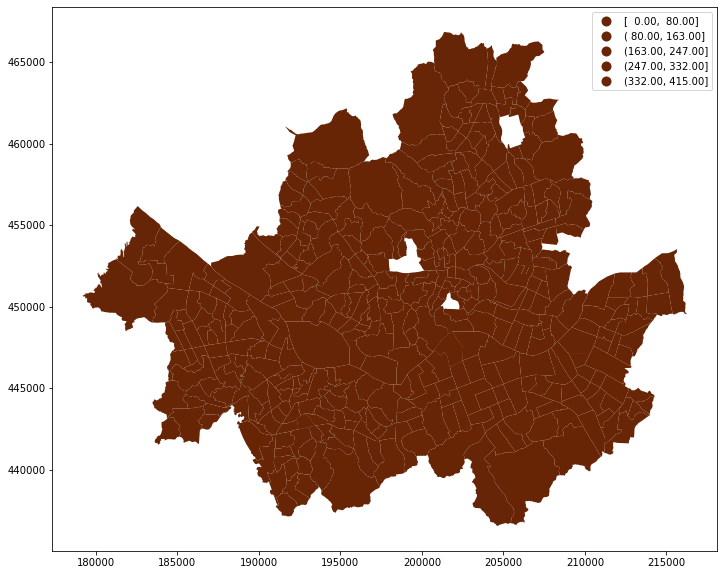

In [19]:
adm_dong_seoul.plot(figsize=(12,10),
                      column='Population',
                      legend=True,
                      scheme='NaturalBreaks',
                      cmap='YlOrBr_r')

Oh.. something's wrong. Let's check with describe method.

In [20]:
adm_dong_seoul['Population'].describe()

count       421
unique      416
top       10613
freq          2
Name: Population, dtype: object

**It seems like jupyter notebook is not reading the values as numbers. [(stackoverflow)](https://stackoverflow.com/questions/33957720/how-to-convert-column-with-dtype-as-object-to-string-in-pandas-dataframe) So I will change the values' datatype from object to string.**

In [21]:
adm_dong_seoul['Population'] = pd.to_numeric(Seoul_data['Population'])
adm_dong_seoul['Number of workers'] = pd.to_numeric(Seoul_data['Number of workers'])
adm_dong_seoul['Public_transportation'] = pd.to_numeric(Seoul_data['Public_transportation'])
adm_dong_seoul['Car'] = pd.to_numeric(Seoul_data['Car'])

Checking both of the variables to check if descriptive statistics are working for them.

In [22]:
adm_dong_seoul['Population'].describe()

count      421.000000
mean     10306.570071
std       4069.435732
min        160.000000
25%       7599.000000
50%      10078.000000
75%      12741.000000
max      26810.000000
Name: Population, dtype: float64

In [23]:
adm_dong_seoul['Number of workers'].describe()

count       420.000000
mean      12287.790476
std       18910.693551
min         341.000000
25%        3878.250000
50%        6475.000000
75%       11989.000000
max      164278.000000
Name: Number of workers, dtype: float64

In [24]:
adm_dong_seoul['Car'].describe()

count    421.000000
mean      21.409739
std        5.885254
min       12.700000
25%       16.700000
50%       20.900000
75%       26.600000
max       34.700000
Name: Car, dtype: float64

**And here, I also realized that plotting the raw population and number of workers is meaningless. To make it more useful, I will devide them by area.** (The commute mode values are already calculated in percentage.)

In [25]:
adm_dong_seoul["area"]=adm_dong_seoul['geometry'].area  

I made a new column called 'area' and will use this as denominator.

Now, I will calculate Population/area and keep the results to the column 'Pop_Density' and calculate Number of workers/area and keep the results to the column 'Work_Density' 

In [26]:
adm_dong_seoul["Pop_Density"]=adm_dong_seoul['Population']/adm_dong_seoul['area']
adm_dong_seoul["Work_Density"]=adm_dong_seoul['Number of workers']/adm_dong_seoul['area']

Checking if it worked..

In [27]:
adm_dong_seoul.head()

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,OBJECTID,geometry,Dong,Gu,Population,Number of businesses,Number of workers,...,Bicycle,Taxicab_motorcycle,Public_transportation,Bus,Subway,Bus_and_subway,Car,area,Pop_Density,Work_Density
0,20200630,1101053,사직동,1,"POLYGON ((197702.069 453187.312, 197703.481 45...",사직동,종로구,4765,3541,49536.0,...,3.1,0.6,57.0,36.4,6.1,14.5,15.3,1.158538e+06,0.004113,0.042757
1,20200630,1101054,삼청동,2,"POLYGON ((197980.839 455346.068, 197995.471 45...",삼청동,종로구,1369,712,4577.0,...,3.1,0.6,57.0,36.4,6.1,14.5,15.3,1.479250e+06,0.000925,0.003094
2,20200630,1101055,부암동,3,"POLYGON ((196621.073 456395.880, 196628.373 45...",부암동,종로구,4348,565,3609.0,...,3.1,0.6,57.0,36.4,6.1,14.5,15.3,2.274721e+06,0.001911,0.001587
3,20200630,1101056,평창동,4,"POLYGON ((197800.769 459064.245, 197782.531 45...",평창동,종로구,7518,751,3565.0,...,3.1,0.6,57.0,36.4,6.1,14.5,15.3,8.947324e+06,0.000840,0.000398
4,20200630,1101057,무악동,5,"POLYGON ((196444.745 453384.564, 196471.668 45...",무악동,종로구,3203,581,1598.0,...,3.1,0.6,57.0,36.4,6.1,14.5,15.3,3.695239e+05,0.008668,0.004324


Yay it worked! I want to see what 'Dong's are top ranked for each density parameter. So I will sort them in descending order.

Before sorting, I want to make the data lighter. By selecting column to keep. First, I make the list of columns..

In [28]:
list(adm_dong_seoul)

['BASE_DATE',
 'ADM_DR_CD',
 'ADM_DR_NM',
 'OBJECTID',
 'geometry',
 'Dong',
 'Gu',
 'Population',
 'Number of businesses',
 'Number of workers',
 'Walked',
 'Bicycle',
 'Taxicab_motorcycle',
 'Public_transportation',
 'Bus',
 'Subway',
 'Bus_and_subway',
 'Car',
 'area',
 'Pop_Density',
 'Work_Density']

and make a new variable 'H_columns_to_keep' and give the value to variable.

In [29]:
H_comlumns_to_keep = ['Dong','Pop_Density', 'Work_Density']

Now, I will generate a new variable to keep the table simple.

In [30]:
Density = adm_dong_seoul[H_comlumns_to_keep]

Checking if it worked..

In [31]:
Density.head()

,Dong,Pop_Density,Work_Density
0,사직동,0.004113,0.042757
1,삼청동,0.000925,0.003094
2,부암동,0.001911,0.001587
3,평창동,0.000840,0.000398
4,무악동,0.008668,0.004324


Great! Before doing analysis, I want to control maximize the limits of display.

In [32]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

I want to see where are the dense regions of population. I will use sort_values here.

In [33]:
Density.sort_values(by=['Pop_Density'], ascending=False)

,Dong,Pop_Density,Work_Density
305,사당4동,0.049487,0.020087
317,중앙동,0.040970,0.023422
288,신길5동,0.037248,0.044506
287,신길4동,0.037063,0.068385
107,돈암1동,0.036165,0.016122
265,가리봉동,0.035759,0.066498
239,화곡2동,0.035372,0.033971
314,청림동,0.034444,0.013754
321,신원동,0.031893,0.012419
47,왕십리2동,0.030655,0.048226


사당4동, 중앙동, 신길5동, 신길4동, 돈암1동 is top5 region. These are places where there were factories in the past.

In [34]:
Density.sort_values(by=['Work_Density'], ascending=False)

,Dong,Pop_Density,Work_Density
286,신길3동,0.026535,0.303713
7,종로5·6가동,0.008678,0.182080
276,시흥2동,0.011840,0.125510
263,오류1동,0.018114,0.120335
378,거여1동,0.025040,0.119874
365,개포1동,0.016651,0.108073
23,신당5동,0.004332,0.100377
360,대치4동,0.016593,0.083457
342,반포본동,0.014642,0.081171
19,필동,0.001081,0.075563


신길3동, 종로5,6가동, 시흥2동, 오류1동, 거여1동 is top5 region for number of workers. These are places where there were factories and that artisans lived a lot in the past.

Now let's plot and see the spaticial distribution of the density.

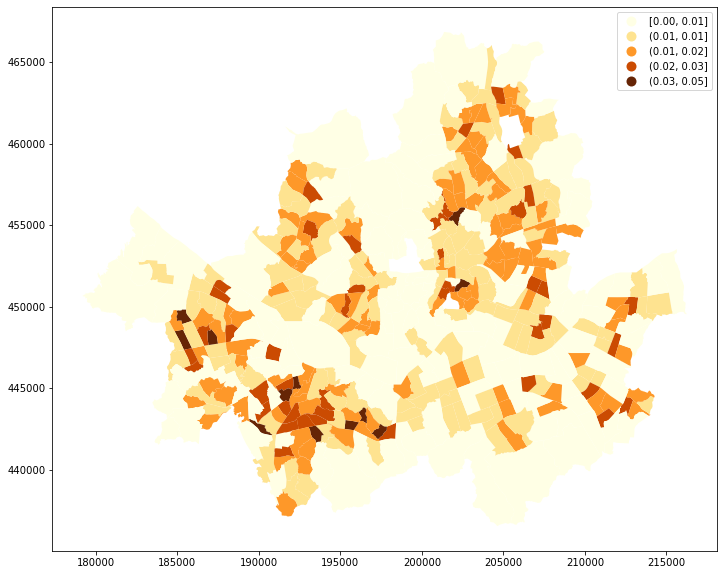

In [35]:
adm_dong_seoul.plot(figsize=(12,10),
                      column='Pop_Density',
                      legend=True,
                      scheme='NaturalBreaks',
                      cmap='YlOrBr')

In total, southwest part of Seoul seems dense

Checking map for job density here..

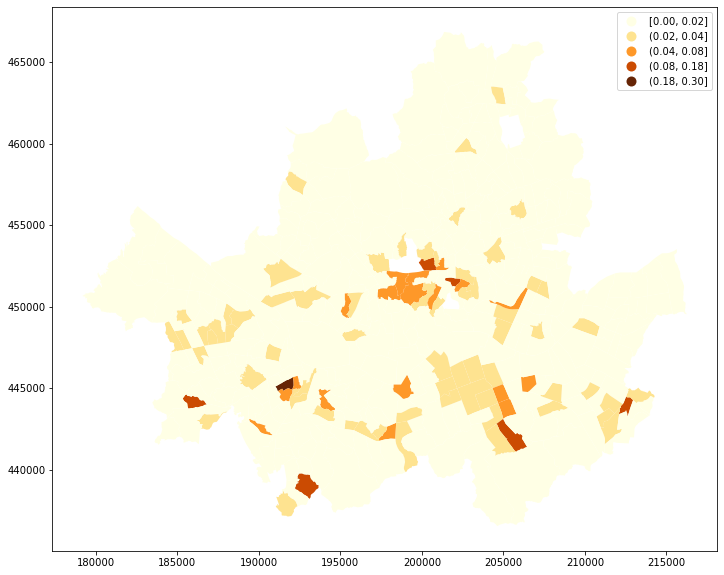

In [36]:
adm_dong_seoul.plot(figsize=(12,10),
                      column='Work_Density',
                      legend=True,
                      scheme='NaturalBreaks',
                      cmap='YlOrBr')

Mid city area and Gangnam area's job density is high. They are CBDs of Seoul.

Lastly, I want to see how people commute in Seoul. What chose car as commute mode most?

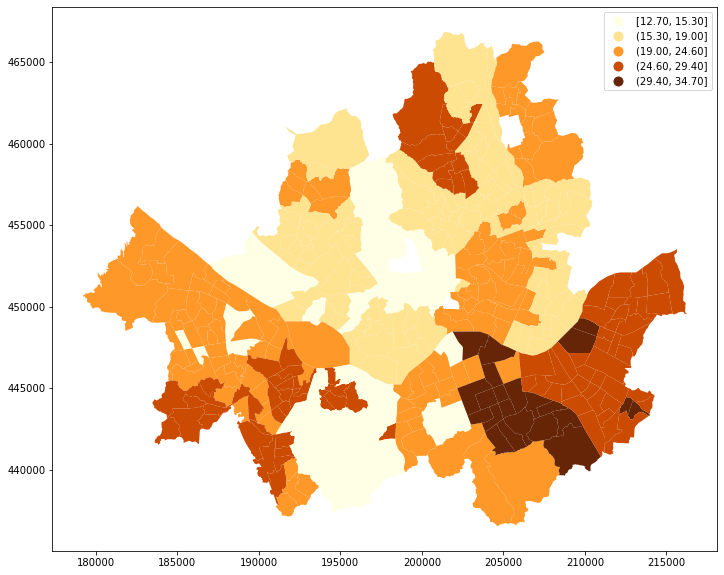

In [37]:
adm_dong_seoul.plot(figsize=(12,10),
                      column='Car',
                      legend=True,
                      scheme='NaturalBreaks',
                      cmap='YlOrBr')

The answer is! Gangnam area (For those of you unfamiliar with Seoul.. Gangnam that I'm talking here is the same Gangnam mentioned in the famous Korean singer Psy's 'Gangnam style' haha.)

And the region where transit use is high is..

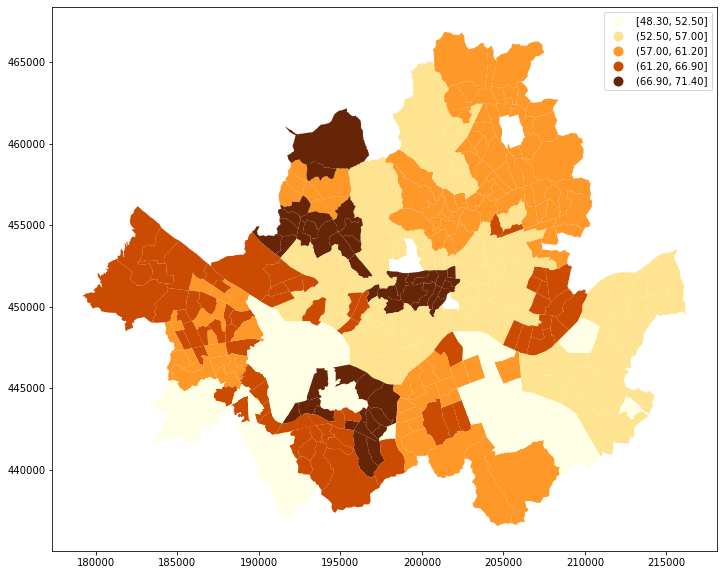

In [38]:
adm_dong_seoul.plot(figsize=(12,10),
                      column='Public_transportation',
                      legend=True,
                      scheme='NaturalBreaks',
                      cmap='YlOrBr')

Jung-gu, which is the very center of Seoul, is the winner(74.1%). Actually, many regions in Seoul chose public transportation as their commute mode, because the region with the lowest percentage, Gangnam area has 48.3%, which is still high.

THIS IS THE END OF THE ASSIGNMENT. WHAT I STILL NEED TO WORK ON IS PLOTTING THESE MAPs ON CONTEXTILY BASEMAP.  

I had some issues regaring projections with contextily so got advice from Yoh. (But still not solved, so planning to visit office hours with my project partner Audrey.)